# Projeto - Modelos Não Supervisionados

Para os modelos com aprendizado não supervisionado, conduziremos um estudo de caso para praticar a análise dos resultados de um projeto de machine learning. Para isso, você deverá se reunir com seu grupo e seguir o passo a passo abaixo.

1. Escolher um Dataset com pelo menos 1000 linhas e que não possua variável target, valide com o professor se o dataset escolhido é válido

2. Utilizar todos os modelos aprendidos neste módulo K-means, DBSCAN e Agglomerative Clustering (apenas uma das abordagens) a fim de comparar os resultados

3. Fazer a otimização dos hiperparâmetros, utilizando a metodologia da preferência do grupo

4. Fazer a discussão de se o modelo está bom o suficiente para ser aplicado em produção

A avaliação será feita em uma apresentação, com o grupo apresentando e discutindo a metodologia de tratamento dos dados e os resultados obtidos.

**Apresentação: 16/10/2023**

Dataset: Young People Survey

https://www.kaggle.com/datasets/miroslavsabo/young-people-survey?select=responses.csv

## História

Uma empresa de eventos que tem como objetivo fazer um festival de música está precisando de uma orientação em como solucionar o problema de separação de uma população em grupos com interesses musicais em comum.

Para isso solicitou a nossa equipe para analisar os dados de seus usuários e propor uma solução para o seu problema!

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando e Analisando DataSet

In [5]:
# df = pd.read_csv('/content/drive/MyDrive/ADA_Braskem/Curso/7-[DS-PY-010] MACHINE LEARNING II/datasets/responses.csv')
# df = pd.read_csv('responses.csv')
df = pd.read_csv('datasets/responses.csv')

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.shape

(1010, 150)

In [8]:
list(df.columns)

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Agein

In [9]:
musical_data = df[['Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera']]

In [10]:
musical_data.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0


In [11]:
musical_data.shape

(1010, 17)

In [12]:
musical_data.describe()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
count,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000
mean,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742
std,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,1.301105,1.375677,1.214434,1.257936,1.237269,1.347173,1.327902,1.324099,1.184094
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
musical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dance              1006 non-null   float64
 1   Folk               1005 non-null   float64
 2   Country            1005 non-null   float64
 3   Classical music    1003 non-null   float64
 4   Musical            1008 non-null   float64
 5   Pop                1007 non-null   float64
 6   Rock               1004 non-null   float64
 7   Metal or Hardrock  1007 non-null   float64
 8   Punk               1002 non-null   float64
 9   Hiphop, Rap        1006 non-null   float64
 10  Reggae, Ska        1003 non-null   float64
 11  Swing, Jazz        1004 non-null   float64
 12  Rock n roll        1003 non-null   float64
 13  Alternative        1003 non-null   float64
 14  Latino             1002 non-null   float64
 15  Techno, Trance     1003 non-null   float64
 16  Opera              1009 

In [14]:
musical_data.isna().sum()

Dance                4
Folk                 5
Country              5
Classical music      7
Musical              2
Pop                  3
Rock                 6
Metal or Hardrock    3
Punk                 8
Hiphop, Rap          4
Reggae, Ska          7
Swing, Jazz          6
Rock n roll          7
Alternative          7
Latino               8
Techno, Trance       7
Opera                1
dtype: int64

In [15]:
musical_data = musical_data.fillna(1)

In [16]:
musical_data.isna().sum()

Dance                0
Folk                 0
Country              0
Classical music      0
Musical              0
Pop                  0
Rock                 0
Metal or Hardrock    0
Punk                 0
Hiphop, Rap          0
Reggae, Ska          0
Swing, Jazz          0
Rock n roll          0
Alternative          0
Latino               0
Techno, Trance       0
Opera                0
dtype: int64

In [17]:
musical_data.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0


In [18]:
# sns.pairplot(musical_data, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

In [19]:
# plt.figure(figsize=(12,12))
# sns.heatmap(musical_data.corr(), annot=True, vmin=-1, vmax=1)
# sns.set(font_scale=1.8)
# plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 3))
scaler.fit(musical_data)
musical_data_scaled = scaler.transform(musical_data)

In [21]:
musical_data_scaled = pd.DataFrame(musical_data_scaled, columns=musical_data.columns)

In [22]:
musical_data_scaled.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,0.0,-1.0,0.0,0.0,-1.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,0.0,-1.0,-1.0,-1.0,0.0,1.0,3.0,2.0,2.0,-1.0,1.0,-1.0,2.0,2.0,0.0,-1.0,-1.0
2,0.0,0.0,1.0,2.0,3.0,1.0,3.0,1.0,2.0,-1.0,2.0,1.0,3.0,3.0,3.0,-1.0,1.0
3,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,2.0,0.0,0.0,-1.0,0.0,3.0,-1.0,0.0,-1.0
4,2.0,1.0,0.0,2.0,1.0,3.0,1.0,-1.0,0.0,3.0,1.0,0.0,-1.0,0.0,2.0,0.0,0.0


##  Modelos

### K-means

#### Método do cotovelo

In [23]:
from sklearn.cluster import KMeans

In [24]:
def calc_inercias(X, lista_k):
    lista_wcss = []
    for k in lista_k:
        kmeans = KMeans(n_clusters=k).fit(X)
        labels_clusters = kmeans.labels_
        lista_wcss.append(kmeans.inertia_)
    return lista_wcss

In [25]:
def plot_cotovelo(lista_k, lista_wcss):
    plt.figure(figsize=(8, 5))
    plt.title("Método do cotovelo")
    plt.plot(lista_k, lista_wcss, marker="o")
    plt.xlabel("k (# de clusters)")
    plt.ylabel("Inercia (WCSS)")
    plt.show()

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

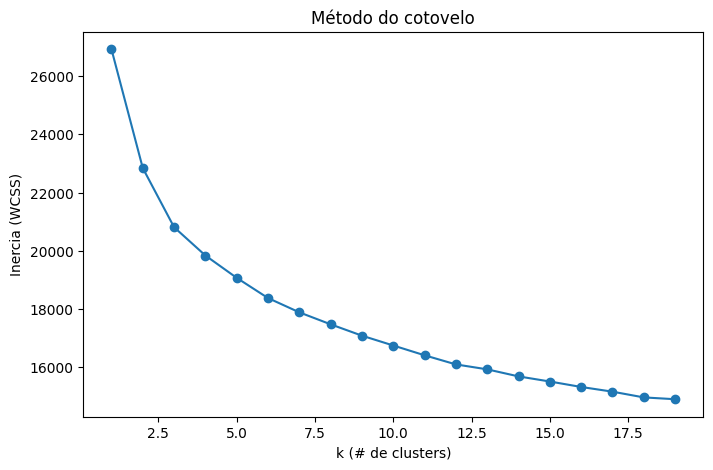

In [26]:
lista_k = range(1, 20)
lista_inercias = calc_inercias(musical_data_scaled, lista_k)
plot_cotovelo(lista_k, lista_inercias)

In [27]:
# Como a distância de k começa a ficar constante, definimos um k = 6

#### Modelo

In [28]:
kmeans_model = KMeans(n_clusters=6)
kmeans_model.fit(musical_data_scaled)

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [29]:
dataset_kmeans_s = musical_data_scaled.copy()
dataset_kmeans_s['classes_kmeans'] = kmeans_model.labels_
dataset_kmeans_s['classes_kmeans'].value_counts()

classes_kmeans
2    235
0    175
5    172
4    159
1    151
3    118
Name: count, dtype: int64

In [30]:
dataset_kmeans_s.head(10)

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,classes_kmeans
0,0.0,-1.0,0.0,0.0,-1.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,4
1,0.0,-1.0,-1.0,-1.0,0.0,1.0,3.0,2.0,2.0,-1.0,1.0,-1.0,2.0,2.0,0.0,-1.0,-1.0,5
2,0.0,0.0,1.0,2.0,3.0,1.0,3.0,1.0,2.0,-1.0,2.0,1.0,3.0,3.0,3.0,-1.0,1.0,0
3,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,2.0,0.0,0.0,-1.0,0.0,3.0,-1.0,0.0,-1.0,5
4,2.0,1.0,0.0,2.0,1.0,3.0,1.0,-1.0,0.0,3.0,1.0,0.0,-1.0,0.0,2.0,0.0,0.0,2
5,0.0,1.0,0.0,1.0,1.0,0.0,3.0,3.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,-1.0,1.0,0
6,3.0,1.0,-1.0,0.0,0.0,3.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0,1.0,1.0,3.0,0.0,4
7,1.0,0.0,-1.0,0.0,0.0,2.0,3.0,-1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,4
8,1.0,-1.0,-1.0,0.0,2.0,1.0,3.0,3.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5
9,0.0,3.0,0.0,0.0,3.0,1.0,3.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,3.0,-1.0,0.0,1


### DBSCAN

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
dbscan = DBSCAN(eps=5, min_samples=4)
dbscan.fit(musical_data_scaled)

DBSCAN(eps=5, min_samples=4)

In [33]:
dataset_dbscan = musical_data_scaled.copy()
dataset_dbscan['classes_dbscan'] = dbscan.labels_
dataset_dbscan['classes_dbscan'].value_counts()

classes_dbscan
 0    1002
-1       8
Name: count, dtype: int64

### Agglomerative Clustering

#### Dendrograma

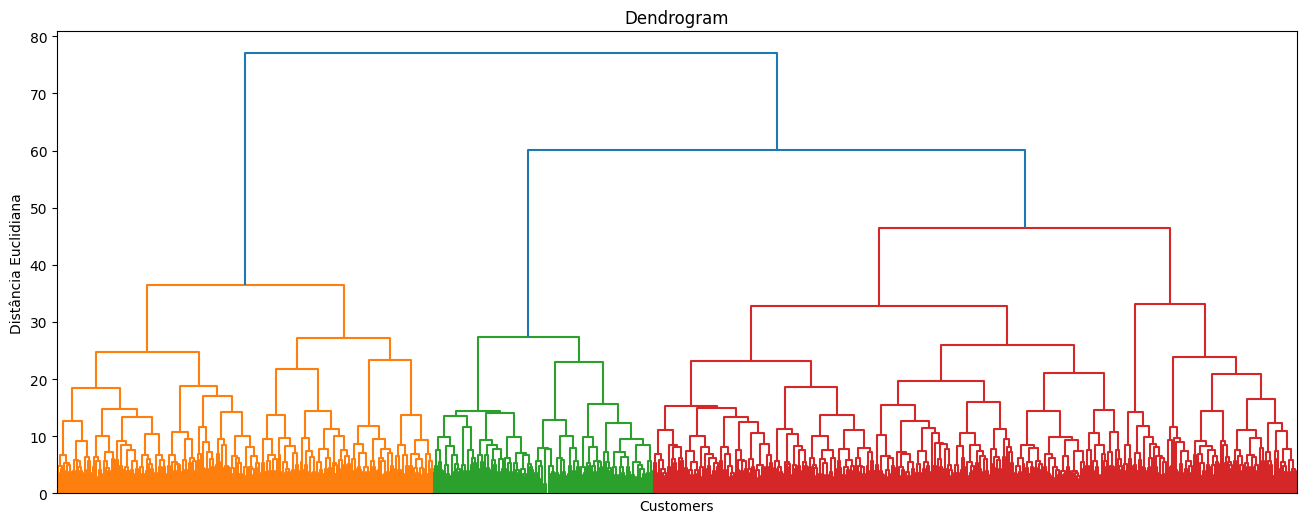

In [34]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,6))
dendrograma = sch.dendrogram(sch.linkage(musical_data_scaled, method='ward'), leaf_font_size=8, color_threshold=56)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distância Euclidiana')
plt.xticks([])
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

agg_cl = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cl.fit(musical_data_scaled)

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [36]:
dataset_aggcl = musical_data_scaled.copy()
dataset_aggcl['classes_aggcl'] = agg_cl.labels_
dataset_aggcl['classes_aggcl'].value_counts()

classes_aggcl
0    524
1    307
2    179
Name: count, dtype: int64

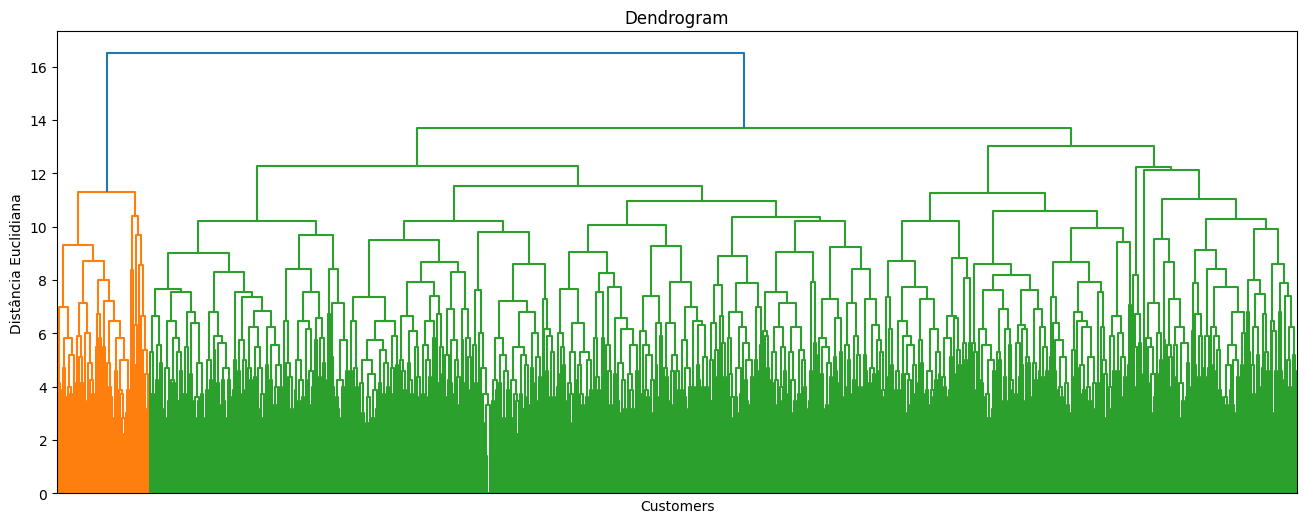

In [37]:
plt.figure(figsize=(16,6))
dendrograma = sch.dendrogram(sch.linkage(musical_data_scaled, method='complete'), leaf_font_size=8, color_threshold=14)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distância Euclidiana')
plt.xticks([])
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering

agg_cl = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
agg_cl.fit(musical_data_scaled)

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete')

In [39]:
dataset_aggcl2 = musical_data_scaled.copy()
dataset_aggcl2['classes_aggcl2'] = agg_cl.labels_
dataset_aggcl2['classes_aggcl2'].value_counts()

classes_aggcl2
0    935
1     75
Name: count, dtype: int64

## Conclusão

Fazer a discussão de se o modelo está bom o suficiente para ser aplicado em produção

Fazendo a análise dos grupos gerados pelo KMeans

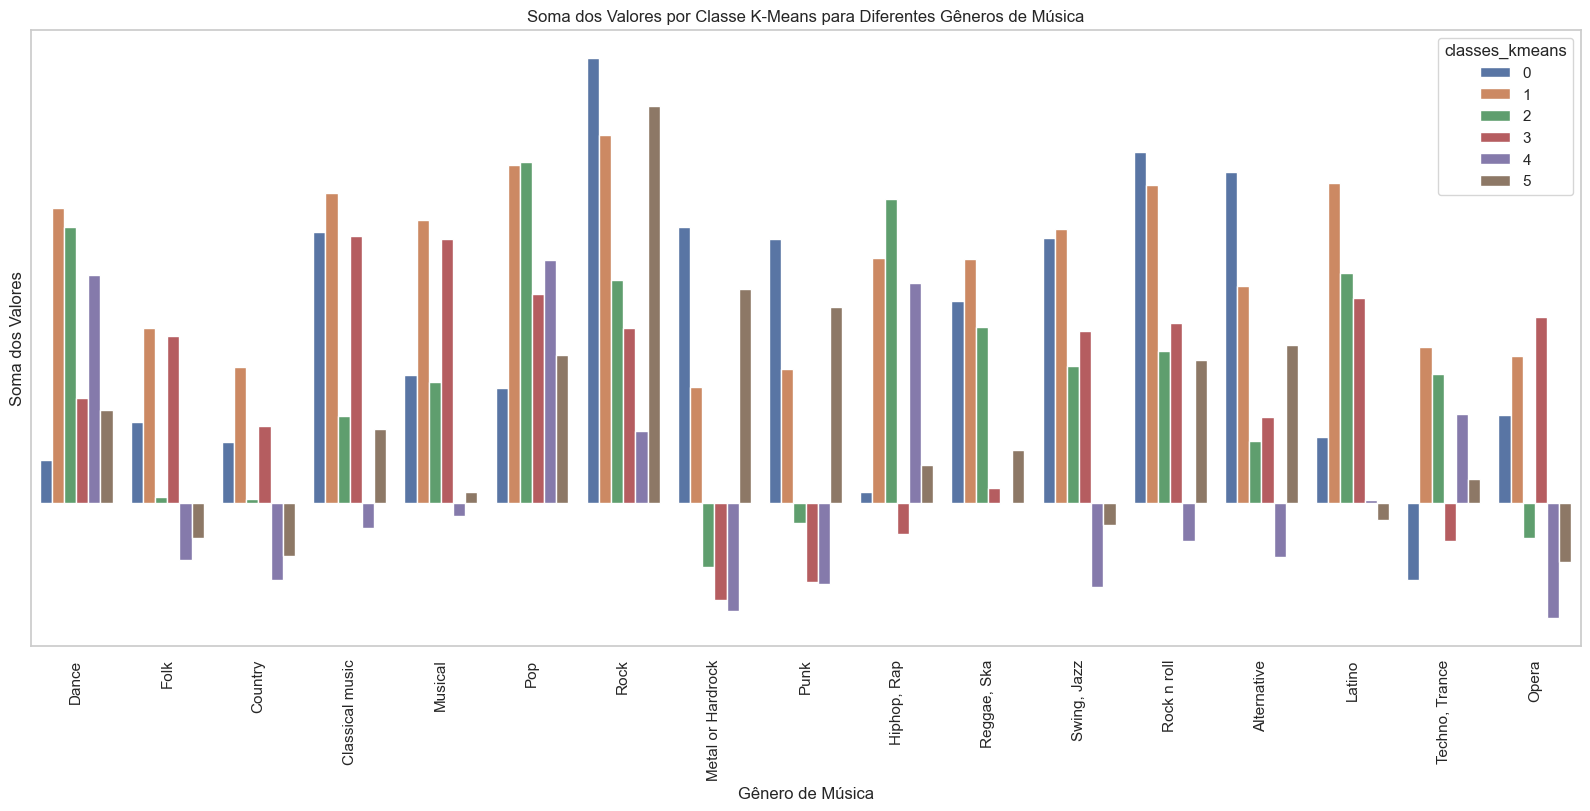

In [40]:
df = dataset_kmeans_s

df_melted = pd.melt(df, id_vars="classes_kmeans", var_name="Music Genre", value_name="Value")

plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

sns.barplot(x="Music Genre", y="Value", hue="classes_kmeans", data=df_melted, errorbar=None)
plt.title("Soma dos Valores por Classe K-Means para Diferentes Gêneros de Música")
plt.xticks(rotation=90)
plt.yticks([])
plt.xlabel("Gênero de Música")
plt.ylabel("Soma dos Valores")
plt.show()

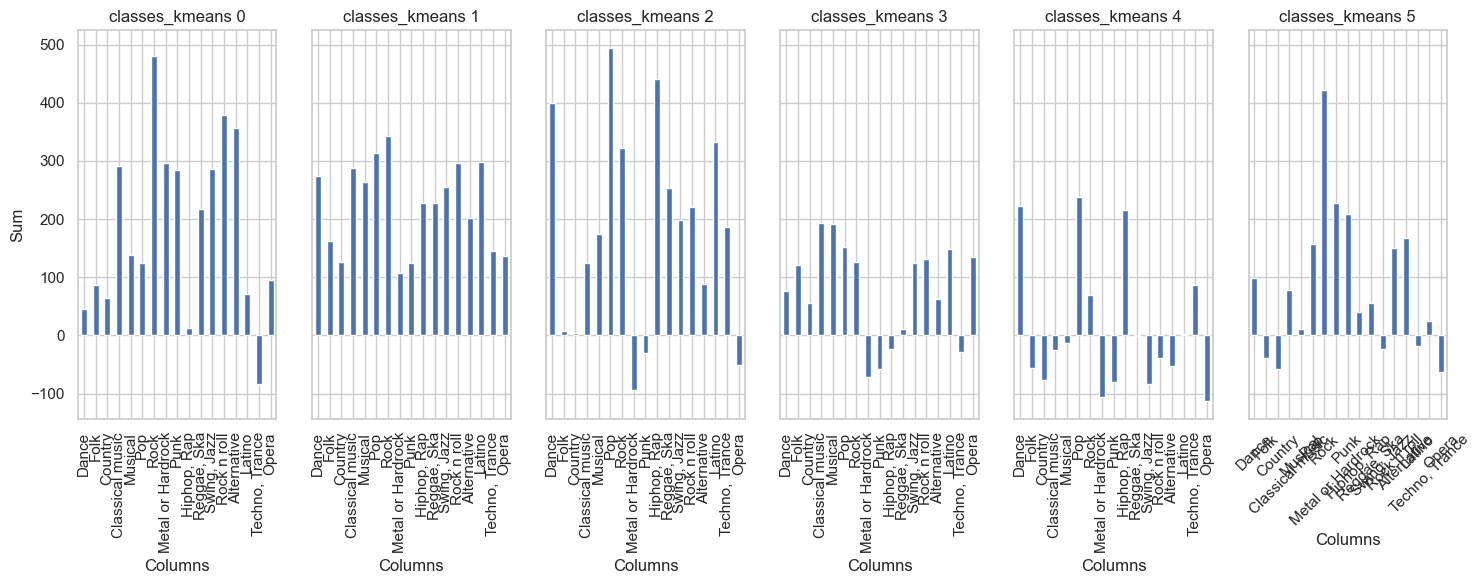

In [41]:
df = dataset_kmeans_s

# Group the data by 'classes_kmeans' and create separate bar plots
grouped = df.groupby('classes_kmeans')
fig, axes = plt.subplots(1, len(grouped), figsize=(15, 6), sharey=True)

for i, (key, group) in enumerate(grouped):
    column_sums = group.drop('classes_kmeans', axis=1).sum()
    column_sums.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'classes_kmeans {key}')
    axes[i].set_xlabel("Columns")
    axes[i].set_ylabel("Sum")
axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

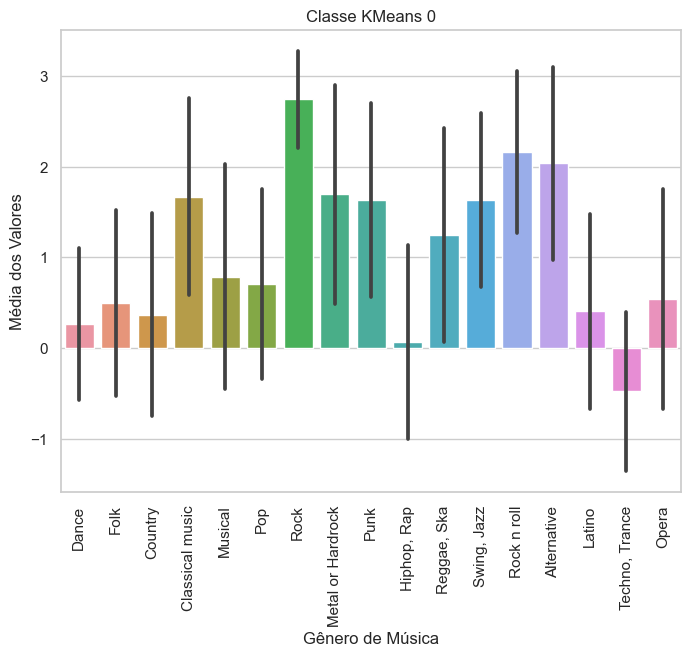

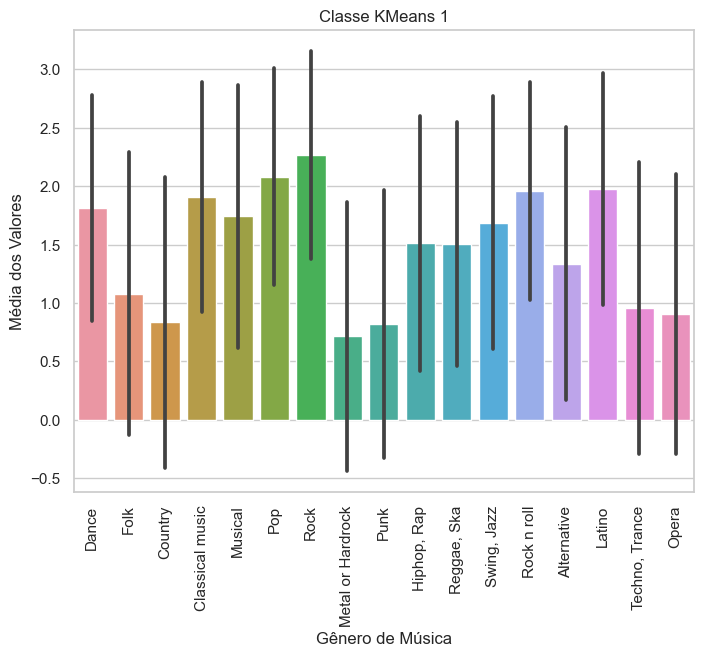

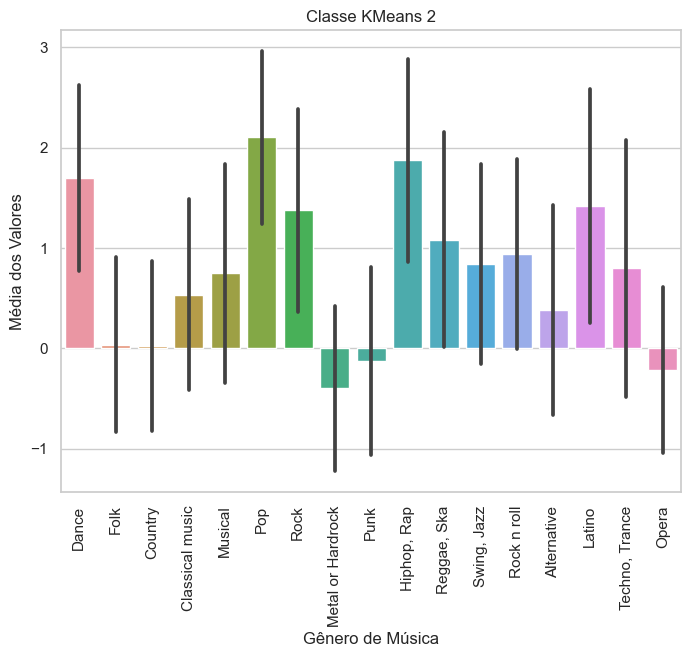

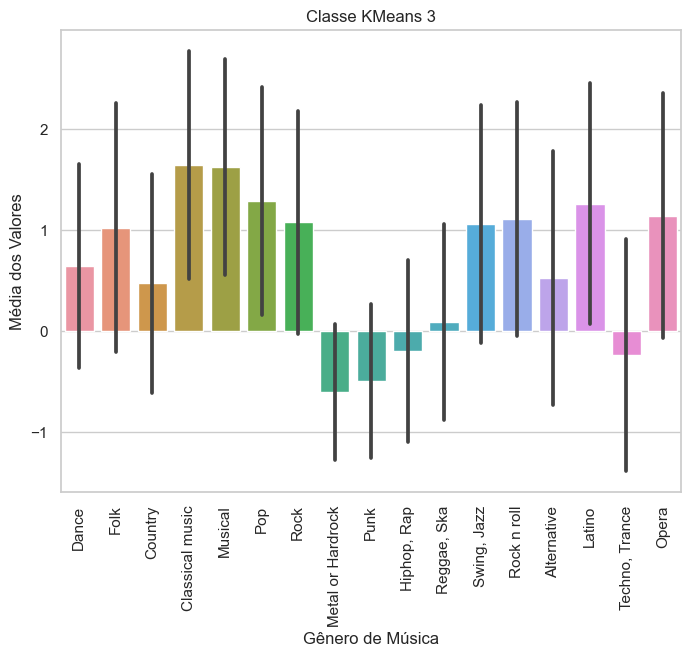

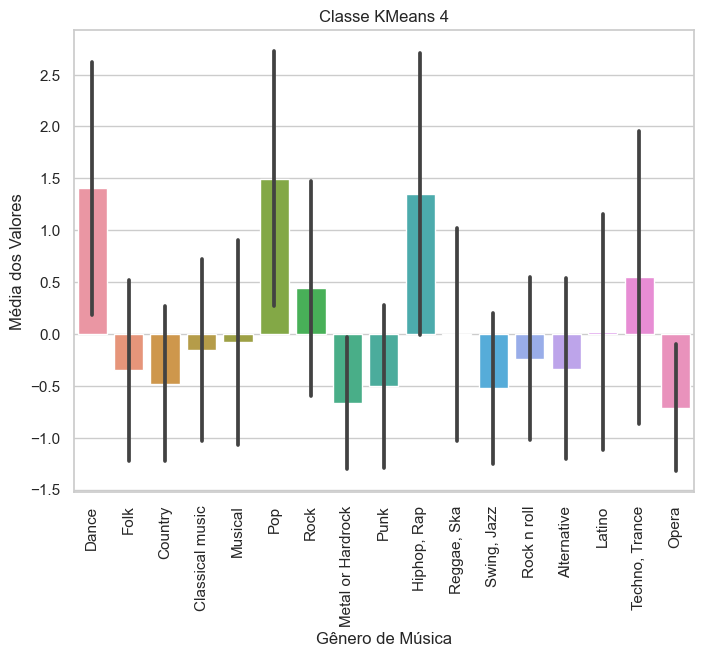

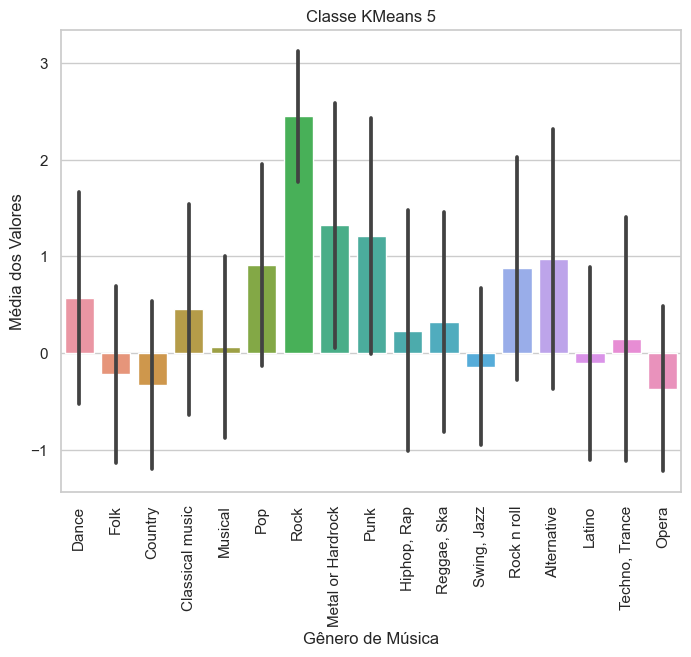

In [42]:
df = dataset_kmeans_s
unique_classes = df['classes_kmeans'].unique()

for class_label in sorted(unique_classes):
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")

    class_data = df[df['classes_kmeans'] == class_label]
    class_data_melted = pd.melt(class_data, id_vars="classes_kmeans", var_name="Music Genre", value_name="Value")

    sns.barplot(x="Music Genre", y="Value", data=class_data_melted, errorbar='sd')

    plt.title(f'Classe KMeans {class_label}')
    plt.xticks(rotation=90)
    plt.xlabel("Gênero de Música")
    plt.ylabel("Média dos Valores")
    plt.show()

Analisando os dados do Agglomerative Cluster

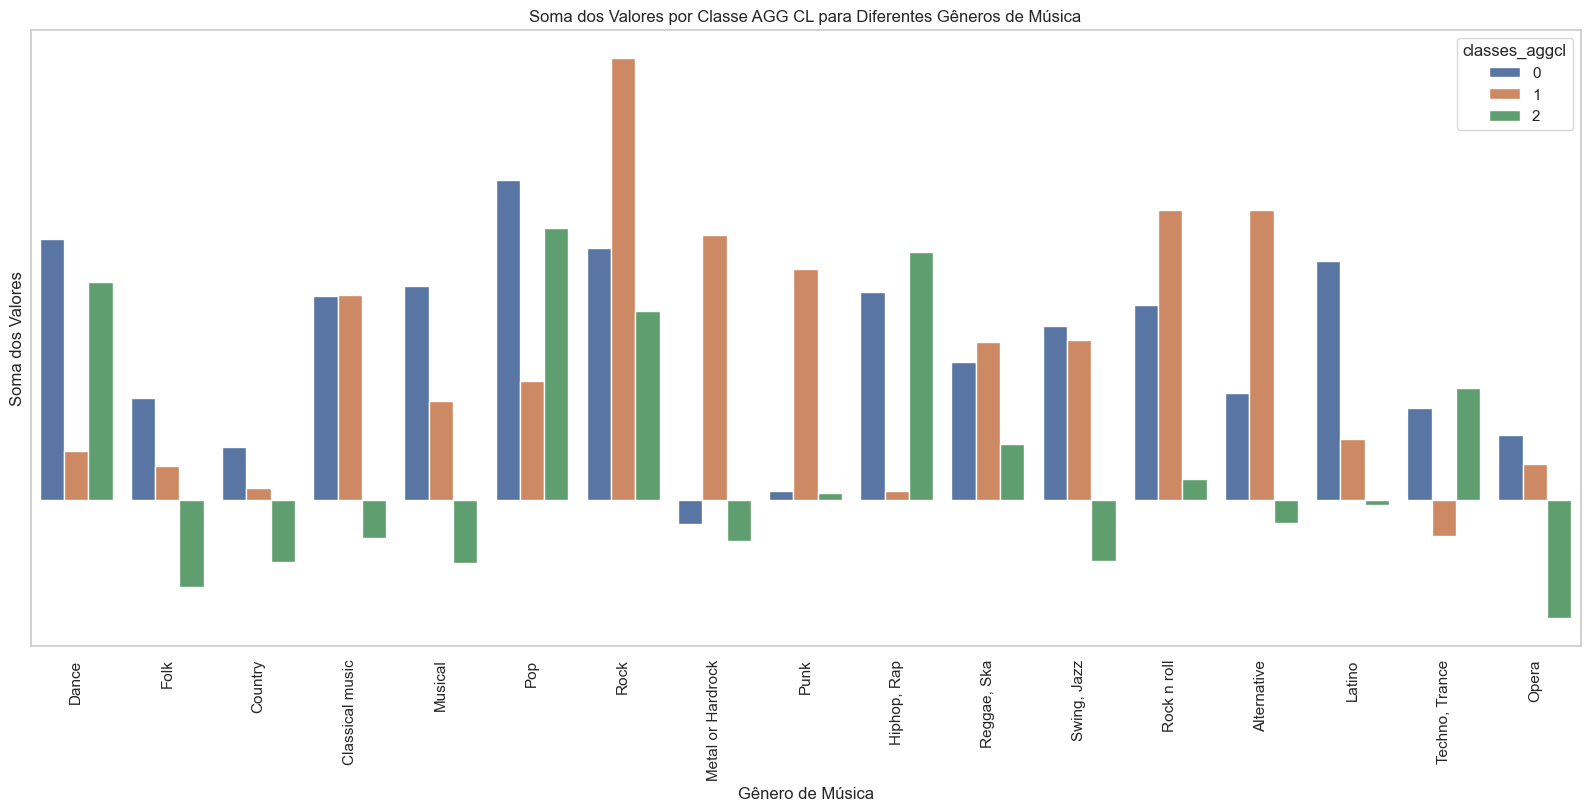

In [43]:
df = dataset_aggcl
df_melted = pd.melt(df, id_vars="classes_aggcl", var_name="Music Genre", value_name="Value")

plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

sns.barplot(x="Music Genre", y="Value", hue="classes_aggcl", data=df_melted, errorbar=None)
plt.title("Soma dos Valores por Classe AGG CL para Diferentes Gêneros de Música")
plt.xticks(rotation=90)
plt.yticks([])
plt.xlabel("Gênero de Música")
plt.ylabel("Soma dos Valores")
plt.show()

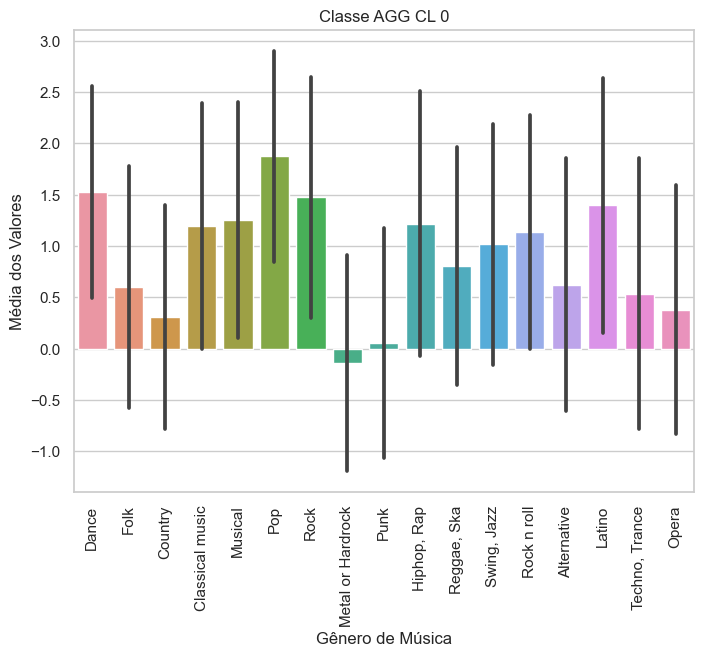

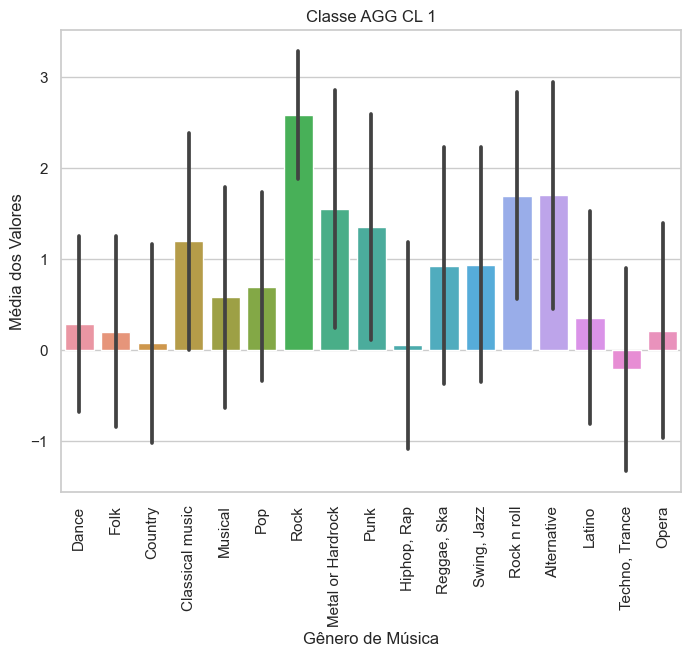

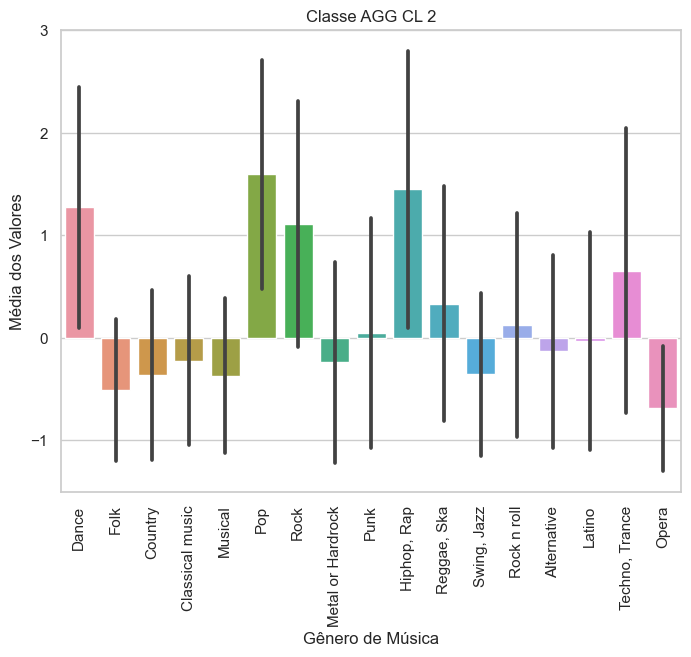

In [44]:
df = dataset_aggcl
unique_classes = df['classes_aggcl'].unique()

for class_label in sorted(unique_classes):
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")

    class_data = df[df['classes_aggcl'] == class_label]
    class_data_melted = pd.melt(class_data, id_vars="classes_aggcl", var_name="Music Genre", value_name="Value")

    sns.barplot(x="Music Genre", y="Value", data=class_data_melted, errorbar='sd')

    plt.title(f'Classe AGG CL {class_label}')
    plt.xticks(rotation=90)
    plt.xlabel("Gênero de Música")
    plt.ylabel("Média dos Valores")
    plt.show()